In [3]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['text.usetex'] = True
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
#})

[('X0', 'Y0'), ('X0', 'Y1'), ('X0', 'Y2'), ('X1', 'Y0'), ('X1', 'Y1'), ('X1', 'Y2')]
[('Y0', 'E'), ('Y1', 'E'), ('Y2', 'E')]
[('X0', 'Y0'), ('X0', 'Y1'), ('X0', 'Y2'), ('X1', 'Y0'), ('X1', 'Y1'), ('X1', 'Y2'), ('Y0', 'E'), ('Y1', 'E'), ('Y2', 'E')]
{('X0', 'Y0'): 'W_0,0', ('X0', 'Y1'): 'W_0,1', ('X0', 'Y2'): 'W_0,2', ('X1', 'Y0'): 'W_1,0', ('X1', 'Y1'): 'W_1,1', ('X1', 'Y2'): 'W_1,2', ('Y0', 'E'): 'W_0,E', ('Y1', 'E'): 'W_1,E', ('Y2', 'E'): 'W_2,E'}


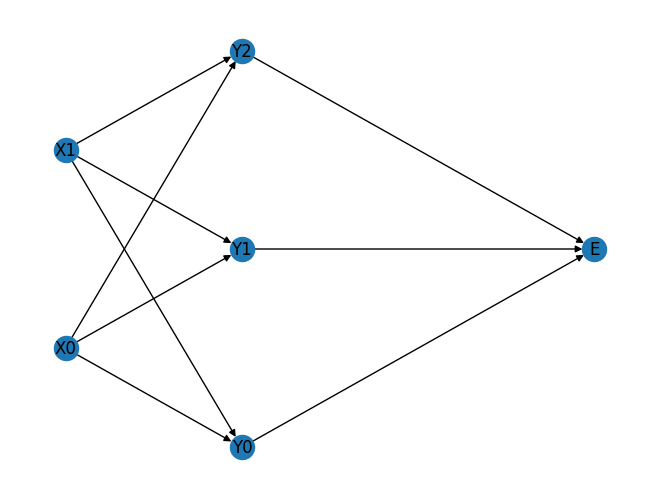

In [8]:
num_X, num_Y = 2, 3
layer_X = [f'X{i}' for i in range(num_X)]
layer_Y = [f'Y{i}' for i in range(num_Y)]
layer_Z = ["E"]

pos_X = {node:(0, i - (num_X - 1)/2) for i, node in enumerate(layer_X)}
pos_Y = {node:(1, i - (num_Y - 1)/2) for i, node in enumerate(layer_Y)}
pos_Z = {layer_Z[0]:(3,0)}

edges_01 = list(itertools.product(layer_X, layer_Y));print(edges_01)
edges_02 = list(itertools.product( layer_Y, ["E"]));print(edges_02)
edges_all = edges_01 + edges_02; print(edges_all)


G = nx.DiGraph()
G.add_edges_from(edges_all)
pos_all = {**pos_X,**pos_Y, **pos_Z}
nx.draw(G, pos = pos_all, with_labels = True)
# print(pos_X)

[['X0', 'Y0', 'E'], ['X0', 'Y1', 'E'], ['X0', 'Y2', 'E']]
[('X0', 'Y0'), ('Y0', 'E'), ('X0', 'Y1'), ('Y1', 'E'), ('X0', 'Y2'), ('Y2', 'E')]


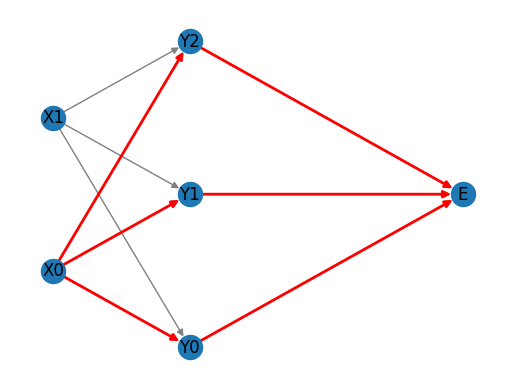

In [13]:
paths = list(nx.all_shortest_paths(G, layer_X[0], layer_Z[0]));print(paths)
edges2 = [(a,b) for path in paths for a,b in zip(path[:-1], path[1:]) ]; print(edges2)
#edge_labels = {(a,b):f'W_{a[-1]},{b[-1]}' for a,b in edges_all};print(edge_labels)

G2 = nx.DiGraph()
G2.add_nodes_from(G.nodes())
G2.add_edges_from(edges2)
nx.draw_networkx_edges(G, pos=pos_all, edge_color = 'grey')
#nx.draw_networkx_edge_labels(G2, pos_all, edge_labels)
nx.draw(G2, pos = pos_all, with_labels = True, edge_color = 'r', width = 2)